In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Game of Thrones 

Dominik Koterwa 454845

**Game of Thrones** is an American fantasy drama television series created by David Benioff and D. B. Weiss for HBO. It is an adaptation of A Song of Ice and Fire, a series of fantasy novels by George R. R. Martin, the first of which is A Game of Thrones. The show premiered on HBO in the United States on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcast over eight seasons.

![GoT](./got_image.jpeg)

In [3]:
data = pd.read_csv("./got_data.csv", index_col=0)

In [4]:
summary_stats = data.describe().transpose()
summary_table = tabulate(summary_stats, headers='keys', tablefmt='fancy_grid')
print("\nSummary of Basic Statistics:")
print(summary_table)


Summary of Basic Statistics:
╒══════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│          │   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞══════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ season   │      73 │ 4.20548 │ 2.1919  │   1   │   2   │  4    │  6    │  8    │
├──────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┤
│ episode  │      73 │ 5.19178 │ 2.82183 │   1   │   3   │  5    │  7    │ 10    │
├──────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┤
│ audience │      73 │ 6.44781 │ 2.82737 │   2.2 │   3.9 │  6.64 │  7.82 │ 13.61 │
╘══════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛


### Viewership over time

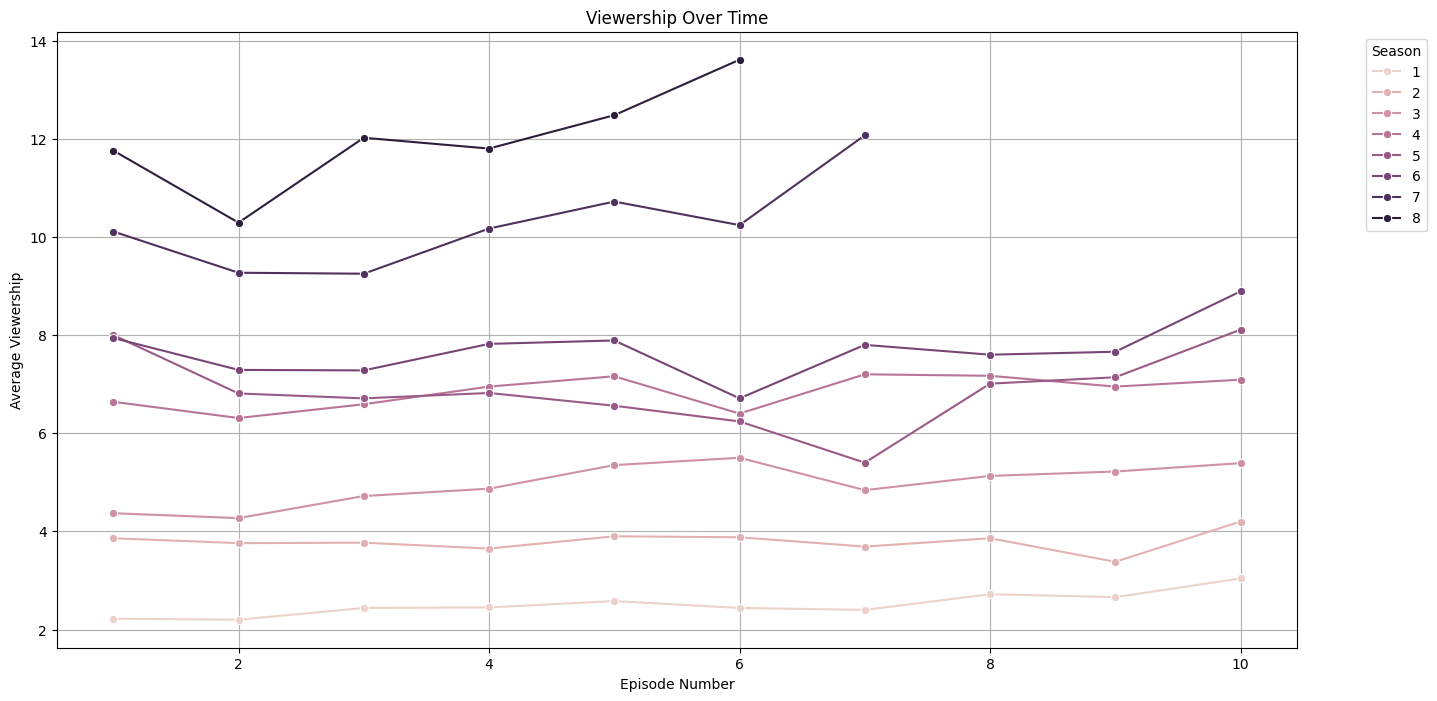

In [5]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=data, x='episode', y='audience', hue='season', errorbar=None, legend="full", marker="o")
plt.title('Viewership Over Time')
plt.xlabel('Episode Number')
plt.ylabel('Average Viewership')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Mean episode-to-episode changes

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

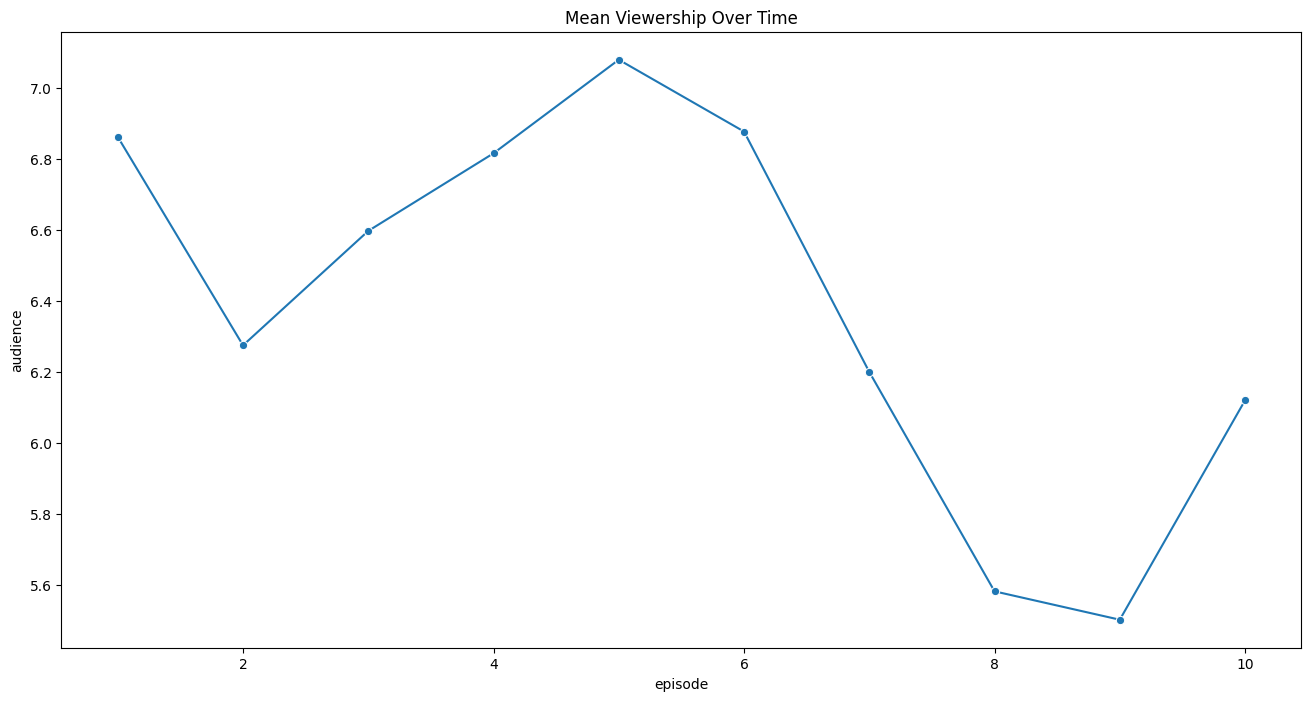

In [6]:
mean_audience_per_episode = data.groupby('episode')['audience'].mean().reset_index()
plt.figure(figsize=(16, 8))
sns.lineplot(data=mean_audience_per_episode, x='episode', y='audience', errorbar=None, marker="o")
plt.title('Mean Viewership Over Time')
plt.xlabel

### Changes in the viewership across seasons

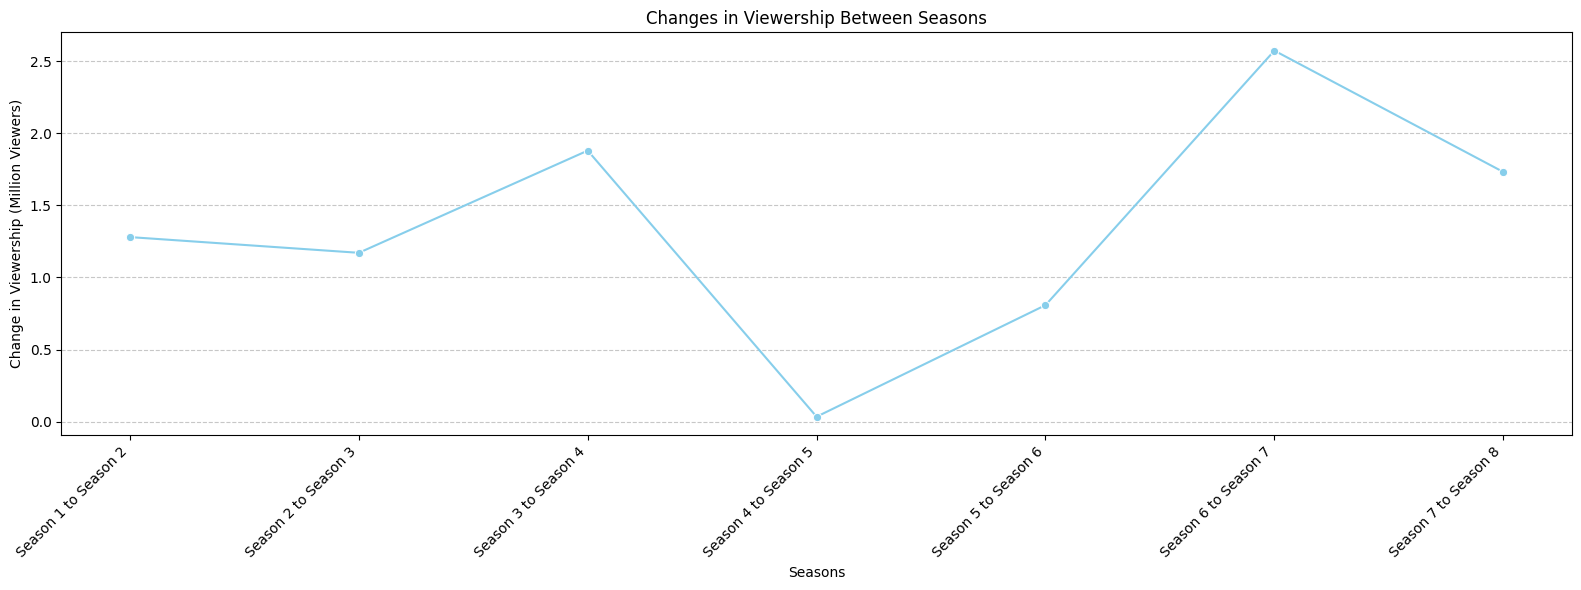

In [7]:
changes = {}
for season in range(1, 8):
    current_season = data[data['season'] == season]['audience'].mean()
    next_season = data[data['season'] == season + 1]['audience'].mean()
    change = next_season - current_season
    changes[f'Season {season} to Season {season+1}'] = change
    
changes_df = pd.DataFrame(changes.items(), columns=['Seasons', 'Change in Viewership'])

plt.figure(figsize=(16, 6))
sns.lineplot(data=changes_df, x='Seasons', y='Change in Viewership', marker='o', color='skyblue')
plt.title('Changes in Viewership Between Seasons')
plt.xlabel('Seasons')
plt.ylabel('Change in Viewership (Million Viewers)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interesting fact**: Game of Thrones has never noted a decrease in the number of viewers in two consecutive seasons.